# Astrophysics Laboratory - IPython notebook

Welcome students! :)

In this laboratory you work with the Hubble Deep Field (HDF). You have measured photometry in U, B, V, and I bands for some selected galaxies, and now you wish to analyse the photometry by fitting by best galaxy spectrum and extracting the redshift of the galaxy.

You will fit the best galaxy template spectrum and extract the redshift of the galaxy using this interface, which is called **IPython notebook**. IPython notebook is one of the most popular tools in astronomy and it has many advantages. One of them is that you can edit code, save plots, and share it with your collaborators. Many researchers use IPython notebook as their "laboratory notebook". It can also be used as a tutorial, which is partialy the goal here :)

There are two types of cells in an IPython notebook:

1. **Text cell** - like this one, this is a cell where you write text and not code. To turn a cell into a text cell go to "Cell" -> "Cell Type" -> "Markdown".
To edit a text cell, just double-click on the text.

2. **Code cell** - like the next cell, this is a cell where you can edit your code and produce plots. To turn a cell into a code cell go to "Cell" -> "Cell Type" -> "Code". 
To edit a code cell, just click on the code in the cell.

**To run a cell** (either code or text) - press "ctrl"+"enter" on your keyboard when you are in edit mode! 

In [1]:
# comment: this is a code cell, in this cell we import python libraries and edit the plotting setup.

%pylab inline
import numpy
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['text.usetex'] = False

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Goal 1 - Ploting galaxy spectra and showing the photometric filters

In the first part, we will plot the galaxy template spectra that we will use for the redshift estimation, and we will show what the photometric filters look like, so that you can see in which regions in wavelengths the photons are counted.

As a first step, we use the galaxy spectra templates with redshift **z=0**.

In [2]:
# load the spectra and plot them
plt.rcParams['figure.figsize'] = 10, 6


list_of_spectra = glob.glob("Spectra\\*.dat")

galaxy_names = []
for p, path in enumerate(list_of_spectra):
    # extract galaxy name
    galaxy_name = path.split("\\")[-1][:-4]
    
    # load the wavelength and spectrum
    wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    wl_small = wl[(wl >= 2200) & (wl <= 9500)]
    spec_small = spec[(wl >= 2200) & (wl <= 9500)]
    spec_small_norm = spec_small / numpy.median(spec_small)

    # plot the spectrum in the selected range
    plt.figure(p + 1)
    plt.title("galaxy type: %s" % galaxy_name)
    plt.plot(wl_small, spec_small_norm, "k")
    plt.xlabel("wavelength (A)")
    plt.ylabel("normalized flux ()")
    

In [3]:
plt.rcParams['figure.figsize'] = 10, 6

# constract here the filters
wl_filter_small = numpy.arange(2200, 9500, 1)
filter_centers = numpy.array([3000, 4500, 6060, 8140])
filter_widths = numpy.array([1521, 1501, 951, 766])/2
filters = []
for i in range(len(filter_centers)):
    center = filter_centers[i]
    width = filter_widths[i]
    filter_spec = numpy.zeros(len(wl_filter_small))
    filter_spec[(wl_filter_small >= (center - width)) & (wl_filter_small <= (center + width))] = 1.0
    filters.append(filter_spec)
colors_filters = ['purple', 'blue', 'green', 'red']
    
# load the spectra and plot them, plot the response curves of the filters as well
list_of_spectra = glob.glob("Spectra\\*.dat")
galaxy_names = []
for p, path in enumerate(list_of_spectra):
    # extract galaxy name
    galaxy_name = path.split("\\")[-1][:-4]
    
    # load the wavelength and spectrum
    wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    wl_small = wl[(wl >= 2200) & (wl <= 9500)]
    spec_small = spec[(wl >= 2200) & (wl <= 9500)]
    spec_small_norm = spec_small / numpy.median(spec_small)
    
    # plot the spectrum in the selected range
    plt.figure(p + 1)
    plt.title("galaxy type: %s" % galaxy_name)
    plt.step(wl_small, spec_small_norm, "k")
    plt.xlabel("wavelength (A)")
    plt.ylabel("normalized flux ()")
    
    # plot the filters as well
    max_value = numpy.percentile(spec_small_norm, 90) * 0.5
    for i in range(len(filters)):
        plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
        plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)
        
    plt.ylim(0, max_value * 2 * 1.5)

## Goal 2 - changing the redshift of the galaxy and comparing the location of photometry

Now that you know what the galaxy template spectra look like, you will choose a speicifc galaxy and will examine what is the effect of redshift on this galaxy and on its photometry. You can change the galaxy type by yourself and see what happens! You can also change the redshift of the galaxy, what happens to the photons that enter each filter?

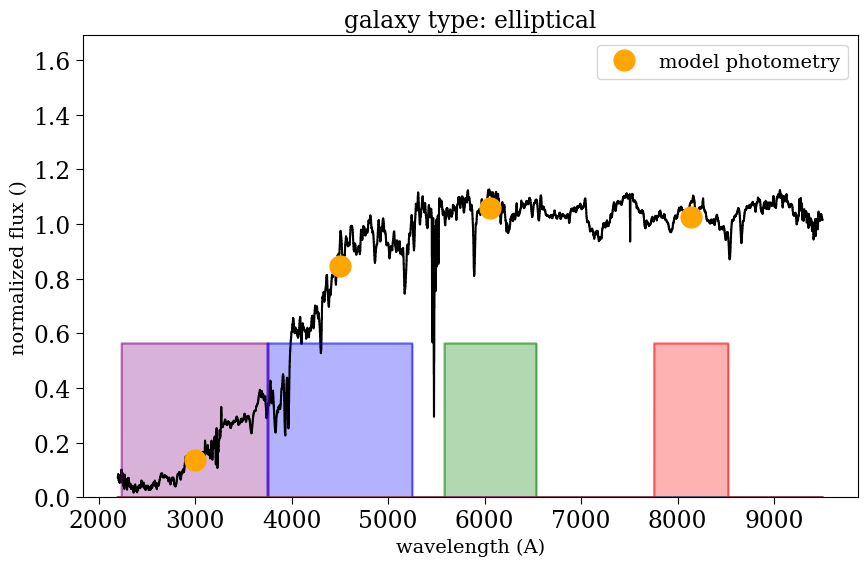

In [4]:
##### Here the student can change the values #####
redshift = 0
galaxy_type = "elliptical"
##################################################

# load the relevant galaxy
path = "Spectra/%s.dat" % galaxy_type
wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

# apply a redshift transformation to the galaxy spectrum
wl_redshifted = wl * (1 + redshift)

# move to a common wavelength grid
wl_small = numpy.arange(2200, 9500, 1)
spec_small = numpy.interp(wl_small, wl_redshifted, spec)
spec_small_norm = spec_small / numpy.median(spec_small)

# plot the galaxy after the redshift transformation
plt.title("galaxy type: %s" % galaxy_type)
plt.step(wl_small, spec_small_norm, "k")
plt.xlabel("wavelength (A)")
plt.ylabel("normalized flux ()")

# the filters do not move, so we can just plot them as they were
max_value = numpy.max(spec_small_norm) * 0.5
for i in range(len(filters)):
    plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
    plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)
    
    
# create the synthetic photometry according to this redshift
syn_photometry = []
for i in range(len(filters)):
    filter_arr = filters[i]
    syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
    syn_photometry.append(syn_phot)
syn_photometry = numpy.array(syn_photometry)

plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=15, label="model photometry")
plt.legend(loc="best")

plt.ylim(0, max_value * 2 * 1.5)
plt.show()

## Goal 3 - fitting your own photometry to a galaxy template and redshift

Now that you have seen what different redshifts do to the photometry that we measure, you can start fitting your own photometry. You should fill the first few lines in the following code: 
1. Insert the photometry that you measured with its errors.
2. Choose a galaxy type from the following list: elliptical, S0, Sa, Sb, sbt1, sbt2, sbt3, sbt4, sbt5, sbt6
3. Choose a redshift for the galaxy: you should choose something in the range 0 to 1.

The code will calculate the photometry of your chosen model at the chosen redshift, and will plot your photometry and model photometry so you can compare the two. The code also outputs the chi square that corresponds to this model.

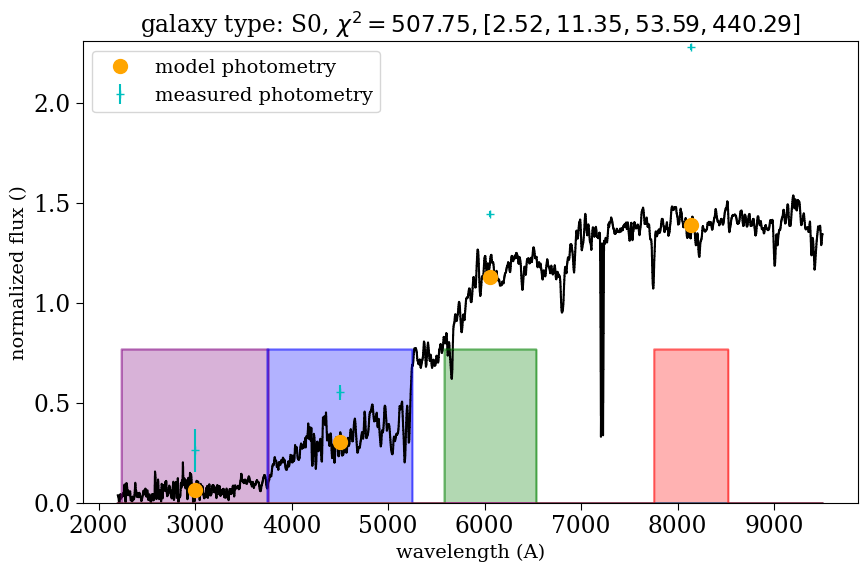

In [5]:
##### Here the student can change the values #####
U = 4.46
dU = 1.82

B = 9.34
dB = 0.63

V = 24.34
dV = 0.29

I = 38.37
dI = 0.28

galaxy_type = "S0"
redshift = 0.314

##################################################

# load the relevant galaxy
path = "Spectra/%s.dat" % galaxy_type
wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

# apply a redshift transformation to the galaxy spectrum
wl_redshifted = wl * (1 + redshift)

# move to a common wavelength grid
wl_small = numpy.arange(2200, 9500, 1)
spec_small = numpy.interp(wl_small, wl_redshifted, spec)
spec_small_norm = spec_small / numpy.median(spec_small)

# plot the galaxy after the redshift transformation
plt.title("galaxy type: %s" % galaxy_type)
plt.step(wl_small, spec_small_norm, "k")
plt.xlabel("wavelength (A)")
plt.ylabel("normalized flux ()")

# the filters do not move, so we can just plot them as they were
max_value = numpy.max(spec_small_norm) * 0.5
for i in range(len(filters)):
    plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
    plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)
    
    
# create the synthetic photometry according to this redshift
syn_photometry = []
for i in range(len(filters)):
    filter_arr = filters[i]
    syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
    syn_photometry.append(syn_phot)
syn_photometry = numpy.array(syn_photometry)
syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=10, label="model photometry")


# plot the measured photometry
meas_photo = numpy.array([U, B, V, I])
meas_errs = numpy.array([dU, dB, dV, dI])

meas_photo_norm = meas_photo / numpy.median(meas_photo)
meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


# compute the chi-square of the fit
residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
plt.title("galaxy type: %s, $\\chi^2 = %s, %s $" % (galaxy_type, numpy.round(chi_square, 2), residuals_st))


plt.legend(loc="best")

plt.ylim(0, max_value * 2 * 1.5)
plt.show()

## Goal 4 - finding the optimal redshift and galaxy spectral type to all your galaxies

Now that you know how to obtain the $\chi^2$ for every redshift and galaxy type, you can find the redshift and galaxy type that gives you the best $\chi^2$. The cell below gives an example of a specific photometry fitting - you can copy this cell so that you'll have one cell for each galaxy that you study. The first few lines are comments (not code) and you can use them to write things about the galaxy (like its name, its morphology, etc).

In order to start a new cell with a new galaxy: 
1. Create a new cell by clicking on "Insert" -> "Insert Cell Below"
2. Copy the code from the previous cell to the new cell
3. Edit the properties of the galaxy and the photometry
4. Find the best redshift.

galaxy type: sbt1
redshift: 0.0
chi min: 63.126801140789894


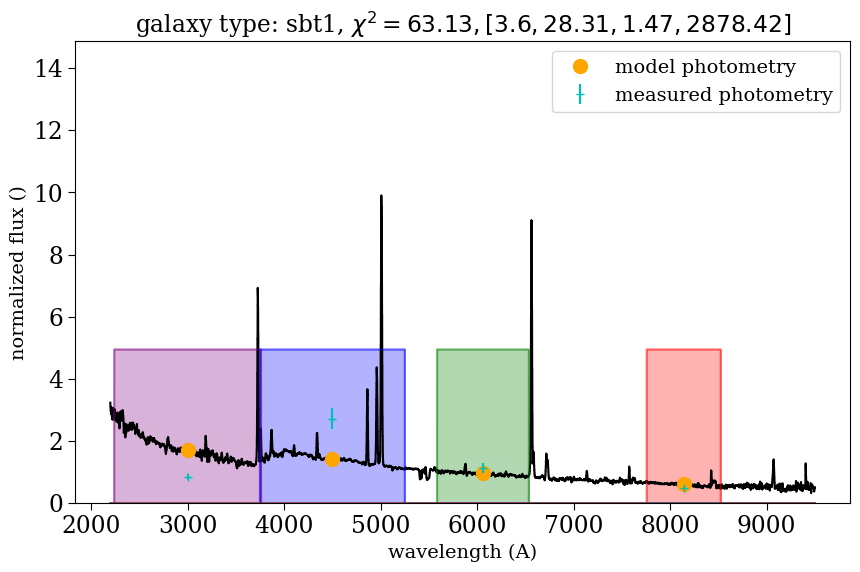

In [28]:
##### Comments of students #######################

##### Galaxy name: 1919.360
##### Galaxy morpholigical type: elliptical
##### Galaxy size in pixels: 20

##### Here the student can change the values #####

U = 1.629 *10**(-17)
dU = 1.82 *10**(-18)

B = 5.184 * 10**(-17)
dB = 0.63 * 10**(-17)

V = 2.177 * 10**(-17)
dV = 0.29 * 10**(-17)

I = 9.455 * 10**(-18)
dI = 0.28 * 10**(-18)

galaxies=["elliptical", "S0", "Sa", "Sb", "sbt1", "sbt2", "sbt3", "sbt4", "sbt5", "sbt6"]
chimins=[]
zmins=[]
for galaxy_type in galaxies:
    chi_z=dict()
    for i in numpy.arange (0,1.0,0.1):
        redshift = i
        ##################################################

        # load the relevant galaxy
        path = "Spectra/%s.dat" % galaxy_type
        wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

        # apply a redshift transformation to the galaxy spectrum
        wl_redshifted = wl * (1 + redshift)

        # move to a common wavelength grid
        wl_small = numpy.arange(2200, 9500, 1)
        spec_small = numpy.interp(wl_small, wl_redshifted, spec)
        spec_small_norm = spec_small / numpy.median(spec_small)

        # plot the galaxy after the redshift transformation
        #plt.title("galaxy type: %s" % galaxy_type)
        #plt.step(wl_small, spec_small_norm, "k")
        #plt.xlabel("wavelength (A)")
        #plt.ylabel("normalized flux ()")

        # the filters do not move, so we can just plot them as they were
        max_value = numpy.max(spec_small_norm) * 0.5
        #for i in range(len(filters)):
            #plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
            #plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)


        # create the synthetic photometry according to this redshift
        syn_photometry = []
        for j in range(len(filters)):
            filter_arr = filters[j]
            syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
            syn_photometry.append(syn_phot)
        syn_photometry = numpy.array(syn_photometry)
        syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
        #plt.plot(filter_centers, syn_photometry_norm, "o", color="orange", markersize=10, label="model photometry")


        # plot the measured photometry
        meas_photo = numpy.array([U, B, V, I])
        meas_errs = numpy.array([dU, dB, dV, dI])

        meas_photo_norm = meas_photo / numpy.median(meas_photo)
        meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
        #plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


        # compute the chi-square of the fit
        residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
        residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
        chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
        #plt.title("galaxy type: %s, $\\chi^2 = %s, %s $" % (galaxy_type, numpy.round(chi_square, 2), residuals_st))

        #plt.legend(loc="best")

        #plt.ylim(0, max_value * 2 * 1.5)
        chi_z[redshift]=chi_square
    #print "z-min=",min(chi_z, key=chi_z.get), "Chi-min=", chi_z[min(chi_z, key=chi_z.get)]
    zmins.append(min(chi_z, key=chi_z.get))
    chimins.append(chi_z[min(chi_z, key=chi_z.get)])   
    
galaxy_type=galaxies[chimins.index(min(chimins))]
redshift = zmins[chimins.index(min(chimins))]
print ("galaxy type:",galaxy_type)
print ("redshift:",redshift)
print ("chi min:",min(chimins))

##################################################


# load the relevant galaxy
path = "Spectra/%s.dat" % galaxy_type
wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

# apply a redshift transformation to the galaxy spectrum
wl_redshifted = wl * (1 + redshift)

# move to a common wavelength grid
wl_small = numpy.arange(2200, 9500, 1)
spec_small = numpy.interp(wl_small, wl_redshifted, spec)
spec_small_norm = spec_small / numpy.median(spec_small)

# plot the galaxy after the redshift transformation
plt.title("galaxy type: %s" % galaxy_type)
plt.step(wl_small, spec_small_norm, "k")
plt.xlabel("wavelength (A)")
plt.ylabel("normalized flux ()")

# the filters do not move, so we can just plot them as they were
max_value = numpy.max(spec_small_norm) * 0.5
for i in range(len(filters)):
    plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
    plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)
    
    
# create the synthetic photometry according to this redshift
syn_photometry = []
for i in range(len(filters)):
    filter_arr = filters[i]
    syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
    syn_photometry.append(syn_phot)
syn_photometry = numpy.array(syn_photometry)
syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=10, label="model photometry")


# plot the measured photometry
meas_photo = numpy.array([U, B, V, I])
meas_errs = numpy.array([dU, dB, dV, dI])

meas_photo_norm = meas_photo / numpy.median(meas_photo)
meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


# compute the chi-square of the fit
residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
plt.title("galaxy type: %s, $\\chi^2 = %s, %s $" % (galaxy_type, numpy.round(chi_square, 2), residuals_st))


plt.legend(loc="best")

plt.ylim(0, max_value * 2 * 1.5)
plt.show()

## Goal 5 (optional) - finding the redshift automatically for different galaxy templates 

This part of the notebook is for students that have a sceintific question that they want to explore, and have measured photometry for more than 6 galaxies. In this case, for each galaxy, you should find the best tempate and the code will automatically fit the photometry and extract the best-fiting redshift. This is different from Goal 4 in the sense that the redshift is found automatically and the students do not have to find it on their own. 
Finally, the cell prints the distance of the galaxy, which can be used to measure the luminosity of each galaxy.

In order to start a new cell with a new galaxy: 
1. Create a new cell by clicking on "Insert" -> "Insert Cell Below"
2. Copy the code from the previous cell to the new cell
3. Edit the properties of the galaxy and the photometry
4. Find the best redshift.

In [ ]:
##### Comments of students #######################

##### Galaxy name: Shiny McPretty
##### Galaxy morpholigical type: spiral, has nice spiral arms
##### Galaxy size in pixels: 45

##### Here the student can change the values #####
U = 78.96
dU = 11.89

B = 54.7
dB = 4.17

V = 66.34
dV = 1.90

I = 53.52
dI = 1.78
galaxy_type = "sbt4"
##################################################
from scipy.optimize import minimize
from scipy.optimize import brute
from scipy import optimize
from astropy import units as u
from astropy import constants as c
from astropy import cosmology as cos
cosmo = cos.FlatLambdaCDM(H0=70, Om0=0.3)

def return_synthetic_photometry(spec):
    """
    the function returns the synthetic photometry for the given spectrum
    """
    # build the filters
    wl_filter_small = numpy.arange(2200, 9500, 1)
    filter_centers = numpy.array([3000, 4500, 6060, 8140])
    filter_widths = numpy.array([1521, 1501, 951, 766])/2
    filters = []
    for i in range(len(filter_centers)):
        center = filter_centers[i]
        width = filter_widths[i]
        filter_spec = numpy.zeros(len(wl_filter_small))
        filter_spec[(wl_filter_small >= (center - width)) & (wl_filter_small <= (center + width))] = 1.0
        filters.append(filter_spec)
        
    # calculate the synthetic photometry
    syn_photometry = []
    for i in range(len(filters)):
        filter_arr = filters[i]
        syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec[filter_arr != 0])
        syn_photometry.append(syn_phot)
    syn_photometry = numpy.array(syn_photometry)
    
    return syn_photometry

def shift_spectrum_by_redshift(wl, spec, redshift):
    """
    the function shifts the spectrum according to the given redshift
    """
    wl_redshifted = wl * (1 + redshift)
    wl_small = numpy.arange(2200, 9500, 1)
    spec_small = numpy.interp(wl_small, wl_redshifted, spec)
    return spec_small

def return_residuals(p, meas_photo, meas_photo_err, wl_template, spec_template):
    """
    function returns the residual of the fit, given the redshift and the template
    """
    redshift = p
    spec_template_shifted = shift_spectrum_by_redshift(wl_template, spec_template, redshift)
    syn_phot = return_synthetic_photometry(spec_template_shifted)
    syn_phot_norm = syn_phot / numpy.median(syn_phot)
    
    meas_photo_norm = meas_photo / numpy.median(meas_photo)
    meas_photo_err_norm = meas_photo_err / numpy.median(meas_photo)
    
    chi_value = numpy.sum((meas_photo_norm - syn_phot_norm)**2/meas_photo_err_norm**2)
    return chi_value

def find_best_redshift(meas_photo, meas_photo_err, galaxy_type):
    """
    The function finds the optimal redshift for the given galaxy type and given photometry
    """
    # load the relevant galaxy
    path = "Spectra/%s.dat" % galaxy_type
    wl_template, spec_template = numpy.loadtxt(path, usecols=[0,1], unpack=True)
    
    
    #out = minimize(return_residuals, p_in, args=(meas_photo, meas_photo_err, wl_template, spec_template), 
    #               bounds = [(0, 0.7),],  method='SLSQP')
    
    # do brute force optimization, the problem is not convex
    p_in = [0.3]
    rranges = [slice (0,1.0,0.01)] #(0, 0.7, 0.001)]
    out = brute(return_residuals, rranges, args=(meas_photo, meas_photo_err, wl_template, spec_template), full_output=True, finish=optimize.fmin)
    
    p_out = out[0]
    best_redshift = p_out[0]
    
    # extract the chi square value for the best redshift
    chi_value = return_residuals(p_out, meas_photo, meas_photo_err, wl_template, spec_template)
    
    return best_redshift, chi_value
    
    
##################################################

# step 1: find the best redshift
meas_photo = numpy.array([U, B, V, I])
meas_errs = numpy.array([dU, dB, dV, dI])

best_redshift, chi_value = find_best_redshift(meas_photo, meas_errs, galaxy_type)
print("Best-fitting redshift: ", best_redshift)
print("Best chi-square for the template: ", chi_value)

# step 2: calculate the luminosity distance
dl = cosmo.luminosity_distance(best_redshift).cgs.value
dl_Mpc = dl * 3.24078e-19 * 1e-6
print("luminosity distance in cm: ", dl)
print("luminosity distance in Mpc: ", dl_Mpc)

# step 3: plot the best fit and the photometry

# load the relevant galaxy
path = "Spectra/%s.dat" % galaxy_type
wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

# apply a redshift transformation to the galaxy spectrum
wl_redshifted = wl * (1 + redshift)

# move to a common wavelength grid
wl_small = numpy.arange(2200, 9500, 1)
spec_small = numpy.interp(wl_small, wl_redshifted, spec)
spec_small_norm = spec_small / numpy.median(spec_small)

# plot the galaxy after the redshift transformation
plt.title("galaxy type: %s" % galaxy_type)
plt.step(wl_small, spec_small_norm, "k")
plt.xlabel("wavelength (A)")
plt.ylabel("normalized flux ()")

# the filters do not move, so we can just plot them as they were
max_value = numpy.max(spec_small_norm) * 0.5
for i in range(len(filters)):
    plt.step(wl_filter_small, filters[i] * max_value, color=colors_filters[i], alpha=0.5)
    plt.fill_between(wl_filter_small, 0, filters[i] * max_value, color=colors_filters[i], alpha=0.3)
    
    
# create the synthetic photometry according to this redshift
syn_photometry = []
for i in range(len(filters)):
    filter_arr = filters[i]
    syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
    syn_photometry.append(syn_phot)
syn_photometry = numpy.array(syn_photometry)
syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
plt.plot(filter_centers, syn_photometry, "o", color="orange", markersize=10, label="model photometry")


# plot the measured photometry
meas_photo = numpy.array([U, B, V, I])
meas_errs = numpy.array([dU, dB, dV, dI])

meas_photo_norm = meas_photo / numpy.median(meas_photo)
meas_photo_err_norm = meas_errs / numpy.median(meas_photo)
plt.errorbar(filter_centers, meas_photo_norm, yerr=meas_photo_err_norm, fmt="+c", label="measured photometry")


# compute the chi-square of the fit
residuals_w = numpy.round((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2, 2)
residuals_st = "[%s, %s, %s, %s]" % (residuals_w[0], residuals_w[1], residuals_w[2], residuals_w[3])
chi_square = numpy.sum((meas_photo_norm - syn_photometry_norm)**2 / meas_photo_err_norm**2)
plt.title("galaxy type: %s, $\\chi^2 = %s, %s $" % (galaxy_type, numpy.round(chi_square, 2), residuals_st))


plt.legend(loc="best")

plt.ylim(0, max_value * 2 * 1.5)
plt.show()


In [ ]:
dl = cosmo.luminosity_distance(0.5).cgs.value
dl_Mpc = dl * 3.24078e-19 * 1e-6
print("luminosity distance in cm: ", dl)
print("luminosity distance in Mpc: ", dl_Mpc)

## Goal 6 (optional) - calculating color 

This part of the notebook is for students that have choosen a sceintific question that has to do with the color of the galaxy. The flux values you have measured are for the photons arriving to the telescop after being redshifted in redshift Z. Meaning - they were not originally amitted in the U/B/V/I wavelength's range. Since each galaxy is in different redshift, in order to compare colors we need to measure the flux that was truely emitted in the above bands. In order to do so we use the galaxy's template spectrum in Z=0 and measure the values from there:

1. Enter the correct galaxy type
2. Make sure Z = 0 (you can try other Z just to see how the values change)

From here you need to calculate the color (remember, these are flux values). You can read more about how to do this:
http://skinakas.physics.uoc.gr/en/files/projects/COLOR_in_ASTRONOMY_p3/P3_COLOURS_IN_ASTRONOMY.pdf


In [ ]:
galaxy_type = 'elliptical'
path = "Spectra/%s.dat" % galaxy_type
wl, spec = numpy.loadtxt(path, usecols=[0,1], unpack=True)

# apply a redshift transformation to the galaxy spectrum
redshift = 0
wl_redshifted = wl * (1 + redshift)

# move to a common wavelength grid
wl_small = numpy.arange(2200, 9500, 1)
spec_small = numpy.interp(wl_small, wl_redshifted, spec)
spec_small_norm = spec_small / numpy.median(spec_small)
# create the synthetic photometry according to this redshift
syn_photometry = []
for i in range(len(filters)):
    filter_arr = filters[i]
    syn_phot = numpy.median(filter_arr[filter_arr != 0] * spec_small_norm[filter_arr != 0])
    syn_photometry.append(syn_phot)
syn_photometry = numpy.array(syn_photometry)
syn_photometry_norm = syn_photometry / numpy.median(syn_photometry)
filter_centers, syn_photometry

U_flux = syn_photometry[0]
B_flux = syn_photometry[1]
V_flux = syn_photometry[2]
I_flux = syn_photometry[3]

print ('U_flux = ',U_flux)
print ('B_flux = ',B_flux)
print ('V_flux = ',V_flux)
print ('I_flux = ',I_flux)